In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import dlib
from imutils import face_utils
from scipy.spatial import distance as dist

%matplotlib inline
datadir = "../../data"

In [3]:
opened = cv2.cvtColor(cv2.imread(datadir+'/open/IMG_1314.jpg'), cv2.COLOR_BGR2RGB)
opened_gray = cv2.cvtColor(cv2.imread(datadir+'/open/IMG_1314.jpg'), cv2.COLOR_BGR2GRAY)
plt.imshow(opened)
plt.show()


closed1 = cv2.cvtColor(cv2.imread(datadir+'/closed/IMG_1008.jpg'), cv2.COLOR_BGR2RGB) 
closed1_gray = cv2.cvtColor(cv2.imread(datadir+'/closed/IMG_1008.jpg'), cv2.COLOR_BGR2GRAY)
closed2 = cv2.cvtColor(cv2.imread(datadir+'/closed/IMG_1123.jpg'), cv2.COLOR_BGR2RGB)
closed2_gray = cv2.cvtColor(cv2.imread(datadir+'/closed/IMG_1123.jpg'), cv2.COLOR_BGR2GRAY)
plt.imshow(closed1)
plt.show()
plt.imshow(closed2)
plt.show()

[ WARN:0@0.784] global loadsave.cpp:244 findDecoder imread_('../../data/open/IMG_1314.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.7.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
left_eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_lefteye_2splits.xml')
right_eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_righteye_2splits.xml')
assert not left_eye_classifier.empty()
assert not right_eye_classifier.empty()

In [ ]:
def non_max_suppression(boxes):
    if len(boxes) == 0:
        return []

    boxes = sorted(boxes, key=lambda x: x[2] * x[3], reverse=True)
    keep = [0]

    for i in range(1, len(boxes)):
        overlap = (max(0, min(boxes[keep[-1]][0] + boxes[keep[-1]][2], boxes[i][0] + boxes[i][2]) - max(boxes[keep[-1]][0], boxes[i][0])) *
                   max(0, min(boxes[keep[-1]][1] + boxes[keep[-1]][3], boxes[i][1] + boxes[i][3]) - max(boxes[keep[-1]][1], boxes[i][1]))) / float(boxes[keep[-1]][2] * boxes[keep[-1]][3])

        if overlap == 0:
            keep.append(i)

    return [boxes[i] for i in keep]

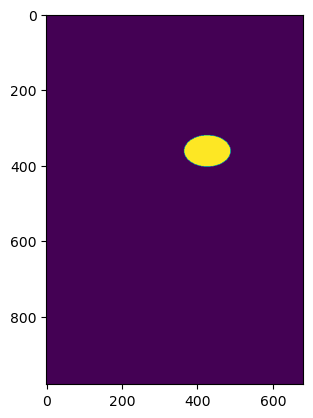

In [ ]:
left_eye = left_eye_classifier.detectMultiScale(opened_gray)
x, y, w, h = max(non_max_suppression(left_eye), key=lambda x: x[0])
left_eye_mask = np.zeros(opened_gray.shape[:2], dtype=np.uint8)
cx, cy = x + w/2, y + h/2
major_axis = w / 2
minor_axis = h / 3    
cv2.ellipse(left_eye_mask, (int(cx), int(cy)), (int(major_axis), int(minor_axis)), 0, 0, 360, 255, -1)
plt.imshow(left_eye_mask)
plt.show()

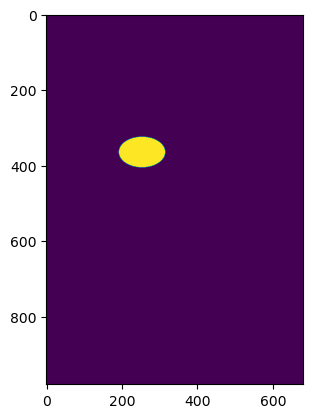

In [ ]:
right_eye = right_eye_classifier.detectMultiScale(opened_gray)
x, y, w, h = min(non_max_suppression(right_eye), key=lambda x: x[0])
right_eye_mask = np.zeros(opened_gray.shape[:2], dtype=np.uint8)
cx, cy = x + w/2, y + h/2
major_axis = w / 2
minor_axis = h / 3    
cv2.ellipse(right_eye_mask, (int(cx), int(cy)), (int(major_axis), int(minor_axis)), 0, 0, 360, 255, -1)
plt.imshow(right_eye_mask)
plt.show()

In [ ]:
left_eye = left_eye_classifier.detectMultiScale(closed1_gray)
x, y, w, h = max(non_max_suppression(left_eye), key=lambda x: x[0])
left_eye_center = int(x + w/2), int(y + h/2)
left_eye_center

(357, 390)

In [ ]:
right_eye = right_eye_classifier.detectMultiScale(closed1_gray)
x, y, w, h = min(non_max_suppression(right_eye), key=lambda x: x[0])
right_eye_center = int(x + w/2), int(y-5 + h/2)
right_eye_center

(212, 399)

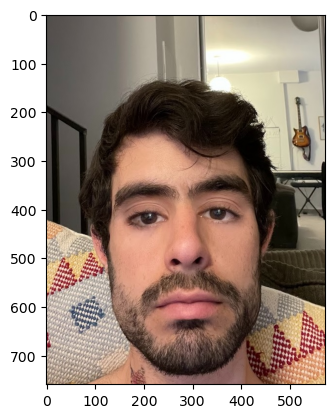

In [ ]:
blend = cv2.seamlessClone(opened, closed1, left_eye_mask, left_eye_center, cv2.NORMAL_CLONE)
blend = cv2.seamlessClone(opened, blend, right_eye_mask, right_eye_center, cv2.NORMAL_CLONE)
plt.imshow(blend)
plt.show()

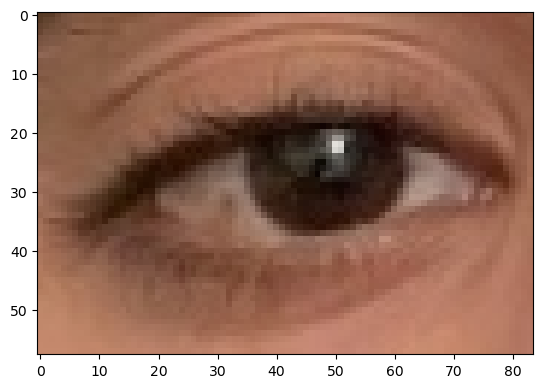

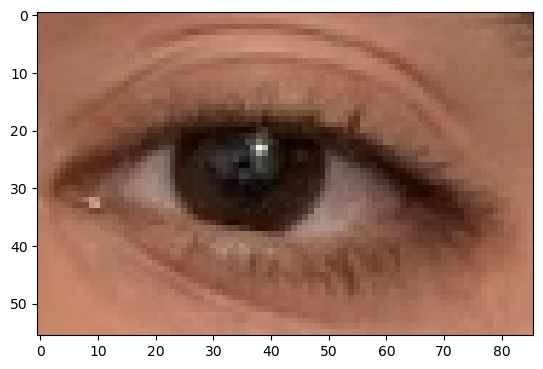

In [ ]:
right_eye = cv2.cvtColor(cv2.imread(datadir+'/right/brown_1.jpg'), cv2.COLOR_BGR2RGB)
h, w = right_eye.shape[:2]
right_eye = cv2.resize(right_eye, (int(w * 0.8), int(h * 0.8)))
left_eye = cv2.cvtColor(cv2.imread(datadir+'/left/brown_1.jpg'), cv2.COLOR_BGR2RGB)
h, w = left_eye.shape[:2]
left_eye = cv2.resize(left_eye, (int(w * 0.8), int(h * 0.8)))
plt.imshow(right_eye)
plt.show()
plt.imshow(left_eye)
plt.show()

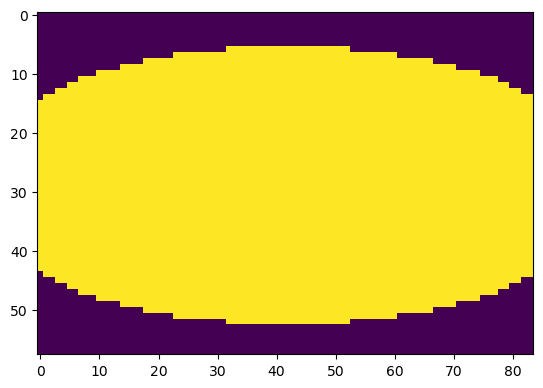

In [ ]:
right_eye_mask = np.zeros(right_eye.shape[:2], dtype=np.uint8)
cx, cy = right_eye.shape[1]/2, right_eye.shape[0]/2
major_axis = w / 2
minor_axis = h / 3    
cv2.ellipse(right_eye_mask, (int(cx), int(cy)), (int(major_axis), int(minor_axis)), 0, 0, 360, 255, -1)
plt.imshow(right_eye_mask)
plt.show()

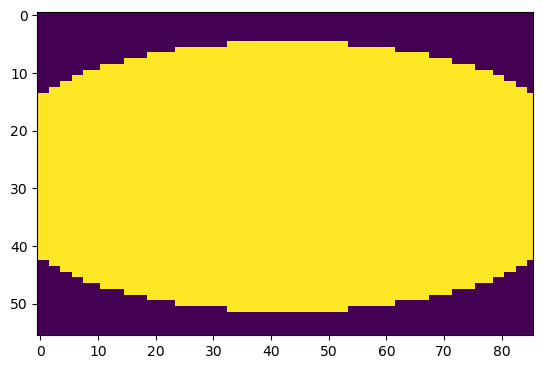

In [ ]:
left_eye_mask = np.zeros(left_eye.shape[:2], dtype=np.uint8)
cx, cy = left_eye.shape[1]/2, left_eye.shape[0]/2
major_axis = w / 2
minor_axis = h / 3    
cv2.ellipse(left_eye_mask, (int(cx), int(cy)), (int(major_axis), int(minor_axis)), 0, 0, 360, 255, -1)
plt.imshow(left_eye_mask)
plt.show()

In [ ]:
left_eye_closed = left_eye_classifier.detectMultiScale(closed1_gray)
x, y, w, h = max(non_max_suppression(left_eye_closed), key=lambda x: x[0])
left_eye_center = int(x + w/2), int(y+10 + h/2)
left_eye_center

(357, 400)

In [ ]:
right_eye_closed = right_eye_classifier.detectMultiScale(closed1_gray)
x, y, w, h = min(non_max_suppression(right_eye_closed), key=lambda x: x[0])
right_eye_center = int(x + w/2), int(y+10 + h/2)
right_eye_center

(212, 414)

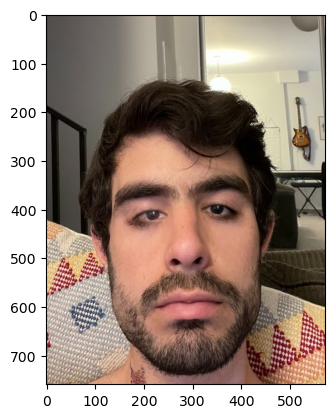

In [ ]:
blend = cv2.seamlessClone(left_eye, closed1, left_eye_mask, left_eye_center, cv2.NORMAL_CLONE)
blend = cv2.seamlessClone(right_eye, blend, right_eye_mask, right_eye_center, cv2.NORMAL_CLONE)
plt.imshow(blend)
plt.show()

In [ ]:
FACIAL_LANDMARK_PREDICTOR = '../../models/shape_predictor.dat'  
MINIMUM_EAR = 0.2

In [ ]:
faceDetector = dlib.get_frontal_face_detector()
landmarkFinder = dlib.shape_predictor(FACIAL_LANDMARK_PREDICTOR)

In [ ]:
(leftEyeStart, leftEyeEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rightEyeStart, rightEyeEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

In [ ]:
def eye_aspect_ratio(eye):
    p2_minus_p6 = dist.euclidean(eye[1], eye[5])
    p3_minus_p5 = dist.euclidean(eye[2], eye[4])
    p1_minus_p4 = dist.euclidean(eye[0], eye[3])
    ear = (p2_minus_p6 + p3_minus_p5) / (2.0 * p1_minus_p4)
    return ear

def centroid(eye):
    return int(sum(eye[:, 0] / len(eye[:, ]))), int(sum(eye[:, 1] / len(eye[:, ])))

In [ ]:
eyes = []
for image in [closed1_gray, opened_gray]:
    faces = faceDetector(image, 0)
    # For now only support if and only if there is one face in the image.
    assert(len(faces) == 1)
    faceLandmarks = landmarkFinder(image, faces[0])
    faceLandmarks = face_utils.shape_to_np(faceLandmarks)
    leftEye = faceLandmarks[leftEyeStart:leftEyeEnd]
    rightEye = faceLandmarks[rightEyeStart:rightEyeEnd]
    leftEAR = eye_aspect_ratio(leftEye)
    rightEAR = eye_aspect_ratio(rightEye)
    
    # need to make these more robust and also for centroids
    diff_left_1 = np.int32((faceLandmarks[23]+faceLandmarks[43])/2) - faceLandmarks[43]
    diff_left_2 = np.int32((faceLandmarks[24]+faceLandmarks[44])/2) - faceLandmarks[44]
    diff_left_3 = np.int32((faceLandmarks[27]+faceLandmarks[42])/2) - faceLandmarks[42]
    diff_right_1 = np.int32((faceLandmarks[19]+faceLandmarks[37])/2) - faceLandmarks[37]
    diff_right_2 = np.int32((faceLandmarks[20]+faceLandmarks[38])/2) - faceLandmarks[38]
    diff_right_3 = np.int32((faceLandmarks[27]+faceLandmarks[39])/2) - faceLandmarks[39]

    leftEye[0] = leftEye[0] + diff_left_3
    leftEye[1] = leftEye[1] + diff_left_1
    leftEye[2] = leftEye[2] + diff_left_2
    leftEye[3] = leftEye[3] - diff_left_3
    leftEye[4] = leftEye[4] - diff_left_2
    leftEye[5] = leftEye[5] - diff_left_1
    
    rightEye[0] = rightEye[0] - diff_right_3
    rightEye[1] = rightEye[1] + diff_right_1
    rightEye[2] = rightEye[2] + diff_right_2
    rightEye[3] = rightEye[3] + diff_right_3
    rightEye[4] = rightEye[4] - diff_right_2
    rightEye[5] = rightEye[5] - diff_right_1
    eyes.append([
        {
            "kind": "left",
            "EAR": leftEAR,
            "status": "closed" if leftEAR < MINIMUM_EAR else "open",
            "centroid": centroid(leftEye),
            "coordinates": leftEye,
        },
        {
            "kind": "right",
            "EAR": rightEAR,
            "status": "closed" if rightEAR < MINIMUM_EAR else "open",
            "centroid": centroid(rightEye),
            "coordinates": rightEye,
        },
    ])
    
print(eyes)

[[{'kind': 'left', 'EAR': 0.07373087284671365, 'status': 'closed', 'centroid': (356, 414), 'coordinates': array([[305, 402],
       [339, 374],
       [368, 373],
       [408, 422],
       [366, 459],
       [355, 455]])}, {'kind': 'right', 'EAR': 0.10559542766244462, 'status': 'closed', 'centroid': (207, 425), 'coordinates': array([[156, 441],
       [190, 386],
       [219, 384],
       [261, 405],
       [213, 465],
       [204, 473]])}], [{'kind': 'left', 'EAR': 0.3041730986946167, 'status': 'open', 'centroid': (423, 385), 'coordinates': array([[359, 376],
       [405, 336],
       [441, 336],
       [485, 399],
       [436, 433],
       [417, 430]])}, {'kind': 'right', 'EAR': 0.298308859440702, 'status': 'open', 'centroid': (251, 388), 'coordinates': array([[195, 405],
       [233, 341],
       [268, 339],
       [311, 377],
       [261, 433],
       [241, 434]])}]]


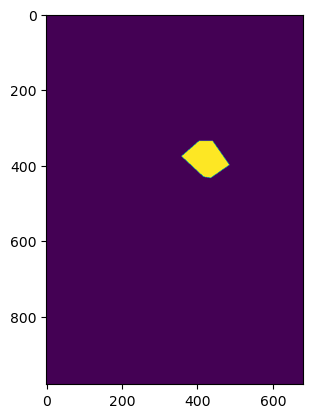

In [ ]:
left_eye_mask = np.zeros(opened_gray.shape[:2], dtype=np.uint8) 
cv2.fillPoly(left_eye_mask, [eyes[1][0]['coordinates']], color=255)
plt.imshow(left_eye_mask)
plt.show()

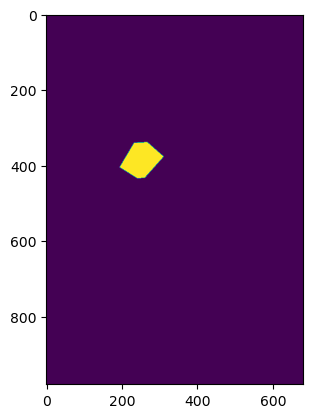

In [ ]:
right_eye_mask = np.zeros(opened_gray.shape[:2], dtype=np.uint8) 
cv2.fillPoly(right_eye_mask, [eyes[1][1]['coordinates']], color=255)
plt.imshow(right_eye_mask)
plt.show()

In [ ]:
eyes[0][1]['centroid']

(207, 425)

In [ ]:
blend = cv2.seamlessClone(opened, closed1, left_eye_mask, (356, 405), cv2.NORMAL_CLONE)
blend = cv2.seamlessClone(opened, blend, right_eye_mask, (207, 415), cv2.NORMAL_CLONE)
plt.imshow(blend)
plt.show()

NameError: name 'cv2' is not defined